In [92]:
import pandas as pd
%matplotlib inline
import numpy as np

In [6]:
psr1 = pd.read_csv('PadmaAwards - PadmaShri2000-09.csv')
psr2 = pd.read_csv('PadmaAwards - PadmaShri2010-161.csv')

In [9]:
psr1.columns.tolist()

['Year', 'Name', 'Field', 'State', 'Country']

In [10]:
psr2.columns.tolist()

['Name', 'Field', 'State', 'Country', 'Year']

In [39]:
psr = pd.concat([psr1,psr2])
psr.sort(['Year'], ascending=True,inplace=True)

# Create variable with TRUE if stark is the attacker
inv_valid = psr['Name'] != "Name"
psr = psr[inv_valid]

/Users/Satish/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from IPython.kernel.zmq import kernelapp as app


In [84]:
fields ={
    'Arts':'Arts',
    'Literature & Education':'Lit_Ed',
    'Medicine':'Medicine',
    'Social Work':'Social-Work',
    'Science & Engineering':'Science-Engg',
    'Civil Service':'Civil-Service',
    'Sports':'Sports',
    'Art':'Arts',
    'Literature and Education':'Lit_Ed',
    'Trade & Industry':'Industry',
    'Public Affairs':'Public-Affairs',
    'Public Service':'Public-Affairs',
    'Science and Engineering':'Science-Engg',
    'Trade and Industry':'Industry',
    'Others':'Others',
    'Social work':'Social-Work',
    'Journalism':'Journalism',
    'Art-Cinema':'Arts',
    'Medicine - Neurology':'Medicine',
    'Art - Theatre':'Arts',
    'Commentary and Broadcasting':'Journalism',
    'WildLife Conservation':'Social-Work',
    'Civil Services':'Civil-Service',
    'Public Affairs-Legal Affairs':'Public-Affairs',
    'Environment Protection':'Social-Work',
    'Archaeology':'Science-Engg',
    'Research on Himalayan Glaciers':'Science-Engg',
    'Technology Solutions':'Science-Engg',
    'Social Works':'Others',
    'Librarianship':'Others',
    'Great Islamic Scholar':'Others',
    'Yoga & Education':'Others',
    'Fashion Designing':'Others',
    'Other':'Others'
}


def standardize_fields(field):
    if field in fields:
        return fields[field]
    if "Medicine" in field:
        return fields['Medicine']
    if "Literature" in field:
        return fields['Literature & Education']
    if "Art" in field:
        return fields['Arts']
    if "Sports" in field:
        return fields['Sports']    
    if "Science" in field:
        return fields['Science & Engineering']  
    if "Others" in field:
        return fields['Others']       
    else:
        return field
psr["Std_Field"]=psr.Field.apply(lambda x : standardize_fields(x))

In [85]:
len(psr.Std_Field.unique())

11

In [86]:
psr.Field.unique().tolist()

['Public Affairs',
 'Civil Service',
 'Literature & Education',
 'Medicine',
 'Science & Engineering',
 'Social Work',
 'Arts',
 'Librarianship',
 'Sports',
 'Trade & Industry',
 'Science and Engineering',
 'Trade and Industry',
 'Literature and Education',
 'Art',
 'Public Service',
 'Environment Protection',
 'Literature and Education-Sanskrit',
 'Sports-Mountaineering',
 'Medicine-Cardio-Thoracic Surgery',
 'Medicine - Obstetrics and Gynaecology',
 'Medicine-Gastroenterology',
 'Medicine-Endocrinology',
 'Medicine-Orthopaedic',
 'Medicine-Cardiology',
 'Medicine-Padeatrics',
 'Medicine-Neurosurgery',
 'Sports-Discus Throw',
 'Social work',
 'Public Affairs-Legal Affairs',
 'Others-Handicrafts promotion',
 'Others-Archeology',
 'Others-Heritage Conservation',
 'Others-Nursing',
 'Sports-Shooting',
 'Sports-Wrestling',
 'Art-Chhau Dance',
 'Art-Folk Music',
 'Art-Traditional Music of Manipur (Pena)',
 'Art-Puppetry',
 'Art-Dance-Mohiniattam',
 'Art-Chenda Melam-Drum concert',
 'Art-Ca

In [87]:
psr.Std_Field.unique().tolist()

['Public-Affairs',
 'Civil-Service',
 'Lit_Ed',
 'Medicine',
 'Science-Engg',
 'Social-Work',
 'Arts',
 'Others',
 'Sports',
 'Industry',
 'Journalism']

In [88]:
psr.Std_Field.value_counts()

Arts              643
Lit_Ed            512
Medicine          392
Science-Engg      308
Social-Work       306
Civil-Service     222
Sports            179
Industry           92
Public-Affairs     56
Others             46
Journalism          7
Name: Std_Field, dtype: int64

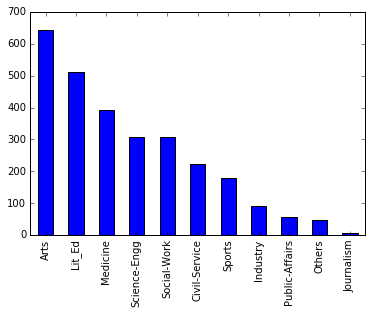

In [94]:
psr.Std_Field.value_counts().plot(kind='bar')

In [99]:
psr.reset_index('Year',inplace=True)
psr

,level_0,index,Country,Field,Name,State,Year,Std_Field
0,0,921,India,Public Affairs,Achamma Mathai,Maharashtra,1954,Public-Affairs
1,1,925,India,Public Affairs,Mirnamayee Ray,Andhra Pradesh,1954,Public-Affairs
2,2,924,India,Public Affairs,Perin Captain,Maharashtra,1954,Public-Affairs
3,3,923,India,Civil Service,Bhag Mehta,Gujarat,1954,Civil-Service
4,4,922,India,Public Affairs,Asha Devi Aryanayakam,Maharashtra,1954,Public-Affairs
5,5,920,India,Civil Service,Tarlok Singh,Punjab,1954,Civil-Service
6,6,919,India,Civil Service,Surinder Kumar Dey,West Bengal,1954,Civil-Service
7,7,918,India,Literature & Education,Shankar Pillai,Delhi,1954,Lit_Ed
8,8,916,India,Public Affairs,Machani Somappa,Andhra Pradesh,1954,Public-Affairs
9,9,917,India,Medicine,Ramji Vasant Khanolkar,Maharashtra,1954,Medicine


In [21]:
pb1 = pd.read_csv('../PadmaBhushan/PadmaAwards - PadmaBhushan2010-16.csv')
pb2 =pd.read_csv('../PadmaBhushan/PadmaAwards - PadmaBhushan1970.csv')



Index([u'Recipient', u'Field', u'State', u'Unnamed: 3', u'Year'], dtype='object')

In [27]:
pb12= pb2.drop(pb2.columns[3],axis=1)
pb11= pb1.drop(pb2.columns[3],axis=1)


Index([u'Name', u'Field', u'State', u'Country', u'Year'], dtype='object')